# Visualizacion

En este notebooks se realizará una exploración del dataset BCCD

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

from random import sample

import os
import os.path as path

In [25]:
bccd_folder = "../data/dataset/"

train_file = path.join(bccd_folder, "train.csv")
test_file = path.join(bccd_folder, "test.csv")

train_dataset = pd.read_csv(train_file, names = ["image", "xmin", "ymin", "xmax", "ymax", "name"])
test_dataset = pd.read_csv(test_file, names = ["image", "xmin", "ymin", "xmax", "ymax", "name"])

train_dataset.head()

,image,xmin,ymin,xmax,ymax,name
0,C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGI...,68,315,286,480,WBC
1,C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGI...,346,361,446,454,RBC
2,C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGI...,53,179,146,299,RBC
3,C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGI...,449,400,536,480,RBC
4,C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGI...,461,132,548,212,RBC


## Estadisticas básicas del Dataset

In [26]:
i1 =  len(train_dataset.groupby("image").groups)
i2 =  len(test_dataset.groupby("image").groups)

print(f"Images\ntraining set:\t{i1}\ntesting set:\t{i2}")

Images
training set:	323
testing set:	41


### Cantidad de cada tipo de células

In [27]:
train_dataset["name"].value_counts()

RBC          3656
WBC           332
Platelets     301
Name: name, dtype: int64

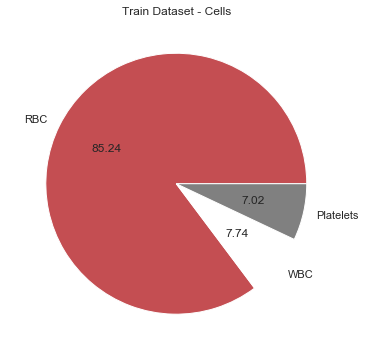

In [28]:
train_dataset["name"].value_counts().plot.pie(figsize=(6,6), colors=['r', 'w', 'gray'], autopct='%.2f')
plt.title("Train Dataset - Cells")
plt.ylabel("");

In [29]:
test_dataset["name"].value_counts()

RBC          499
Platelets     60
WBC           40
Name: name, dtype: int64

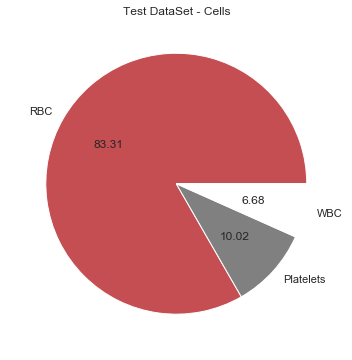

In [30]:
test_dataset["name"].value_counts().plot.pie(figsize=(6,6), colors=['r', "gray", 'w'], autopct='%.2f')
plt.title("Test DataSet - Cells")
plt.ylabel("");

### Cantidad de cada tipo de célula por imagen

In [31]:
train_dataset.groupby("image")["name"].value_counts().head(20)

image                                                                     name     
C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGImages\BloodImage_00001.jpg  RBC          18
                                                                          WBC           1
C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGImages\BloodImage_00002.jpg  RBC          15
                                                                          WBC           1
C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGImages\BloodImage_00003.jpg  RBC          15
                                                                          Platelets     1
                                                                          WBC           1
C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGImages\BloodImage_00004.jpg  RBC          11
                                                                          Platelets     1
                                                                          WBC           1
C:\Users\sebas\D

In [32]:
train_dataset.groupby("image")["name"].value_counts().head(20)

image                                                                     name     
C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGImages\BloodImage_00001.jpg  RBC          18
                                                                          WBC           1
C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGImages\BloodImage_00002.jpg  RBC          15
                                                                          WBC           1
C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGImages\BloodImage_00003.jpg  RBC          15
                                                                          Platelets     1
                                                                          WBC           1
C:\Users\sebas\Desktop\BCCD_Dataset\BCCD\JPEGImages\BloodImage_00004.jpg  RBC          11
                                                                          Platelets     1
                                                                          WBC           1
C:\Users\sebas\D

### Cantidad promedio de cada tipo de célula por imagen

In [33]:
train_rbc_mean = train_dataset[train_dataset["name"] == "RBC"].groupby("image")["name"].value_counts().mean()
train_wbc_mean = train_dataset[train_dataset["name"] == "WBC"].groupby("image")["name"].value_counts().mean()
train_platelets_mean = train_dataset[train_dataset["name"] == "Platelets"].groupby("image")["name"].value_counts().mean()

print(f"RBC mean:\t{train_rbc_mean}\nWBC mean:\t{train_wbc_mean}\nplatelets mean:\t{train_platelets_mean}")

RBC mean:	11.831715210355988
WBC mean:	1.0440251572327044
platelets mean:	1.75


In [34]:
test_rbc_mean = test_dataset[test_dataset["name"] == "RBC"].groupby("image")["name"].value_counts().mean()
test_wbc_mean = test_dataset[test_dataset["name"] == "WBC"].groupby("image")["name"].value_counts().mean()
test_platelets_mean = test_dataset[test_dataset["name"] == "Platelets"].groupby("image")["name"].value_counts().mean()

print(f"RBC mean:\t{test_rbc_mean}\nWBC mean:\t{test_wbc_mean}\nplatelets mean:\t{test_platelets_mean}")

RBC mean:	12.475
WBC mean:	1.0
platelets mean:	2.0689655172413794


### Resumen

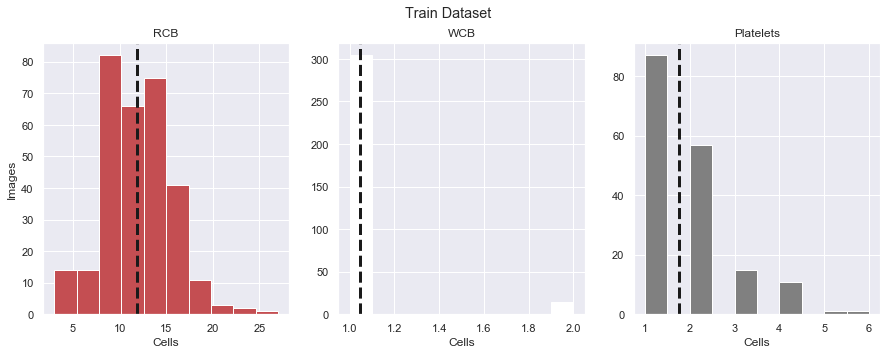

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5) )

# Plotting
train_dataset[train_dataset["name"] == "RBC"].groupby("image")["name"].value_counts().hist(ax=axes[0], color='r',)
axes[0].axvline(train_rbc_mean, color='k', linestyle='dashed', linewidth=3)

train_dataset[train_dataset["name"] == "WBC"].groupby("image")["name"].value_counts().hist(ax=axes[1], color='w',)
axes[1].axvline(train_wbc_mean, color='k', linestyle='dashed', linewidth=3)

train_dataset[train_dataset["name"] == "Platelets"].groupby("image")["name"].value_counts().hist(ax=axes[2], color='gray',)
axes[2].axvline(train_platelets_mean, color='k', linestyle='dashed', linewidth=3)


# Formating
fig.suptitle("Train Dataset")

axes[0].set_title("RCB")
axes[0].set_xlabel("Cells")
axes[0].set_ylabel("Images")

axes[1].set_title("WCB")
axes[1].set_xlabel("Cells")

axes[2].set_title("Platelets")
axes[2].set_xlabel("Cells");

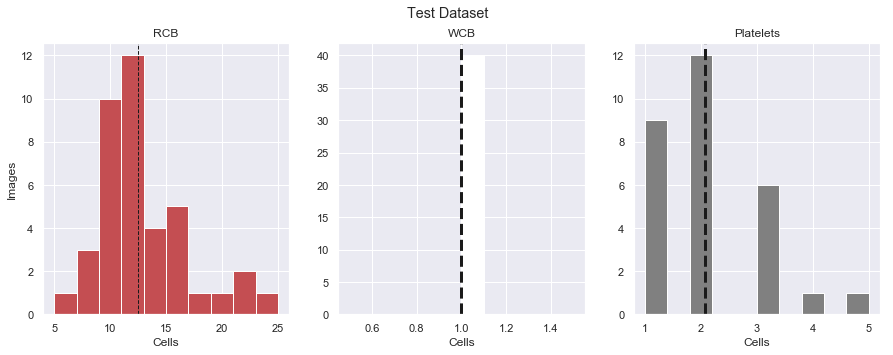

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5) )

# Plotting
test_dataset[test_dataset["name"] == "RBC"].groupby("image")["name"].value_counts().hist(ax=axes[0], color='r',)
axes[0].axvline(test_rbc_mean, color='k', linestyle='dashed', linewidth=1)

test_dataset[test_dataset["name"] == "WBC"].groupby("image")["name"].value_counts().hist(ax=axes[1], color='w',)
axes[1].axvline(test_wbc_mean, color='k', linestyle='dashed', linewidth=3)

test_dataset[test_dataset["name"] == "Platelets"].groupby("image")["name"].value_counts().hist(ax=axes[2], color='gray',)
axes[2].axvline(test_platelets_mean, color='k', linestyle='dashed', linewidth=3)


# Formating
fig.suptitle("Test Dataset")

axes[0].set_title("RCB")
axes[0].set_xlabel("Cells")
axes[0].set_ylabel("Images")

axes[1].set_title("WCB")
axes[1].set_xlabel("Cells")

axes[2].set_title("Platelets")
axes[2].set_xlabel("Cells");

## Imágenes

In [44]:
train_images = train_dataset.groupby("image").groups
test_images = test_dataset.groupby("image").groups

def plot_images(images, dataset):
    fig, axis = plt.subplots(nrows=3, ncols=2,figsize=(15,20) )
    axis = axis.flatten()
    for i, img_path in enumerate(sample(images.keys(), 6)):
        img = mpimg.imread(img_path)
        
        # Plotting
        axis[i].imshow(img)
        for _,cell in dataset.loc[images[img_path]].iterrows():
            color = {"R":"r", "W":"w","P":"gray"}[cell["name"][0]]
            rect = Rectangle((cell["xmin"], cell["ymin"]), width=cell["xmax"] - cell["xmin"],
                              height=cell["ymax"] - cell["ymin"],linewidth=3,edgecolor=color,facecolor='none' )
            axis[i].add_patch(rect)
            axis[i].text(cell["xmin"] + 100, cell["ymin"], cell["name"],
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    size="large")
        # Formating
        axis[i].set_title(path.basename(img_path))
        axis[i].set_xticks([])
        axis[i].set_yticks([])
    

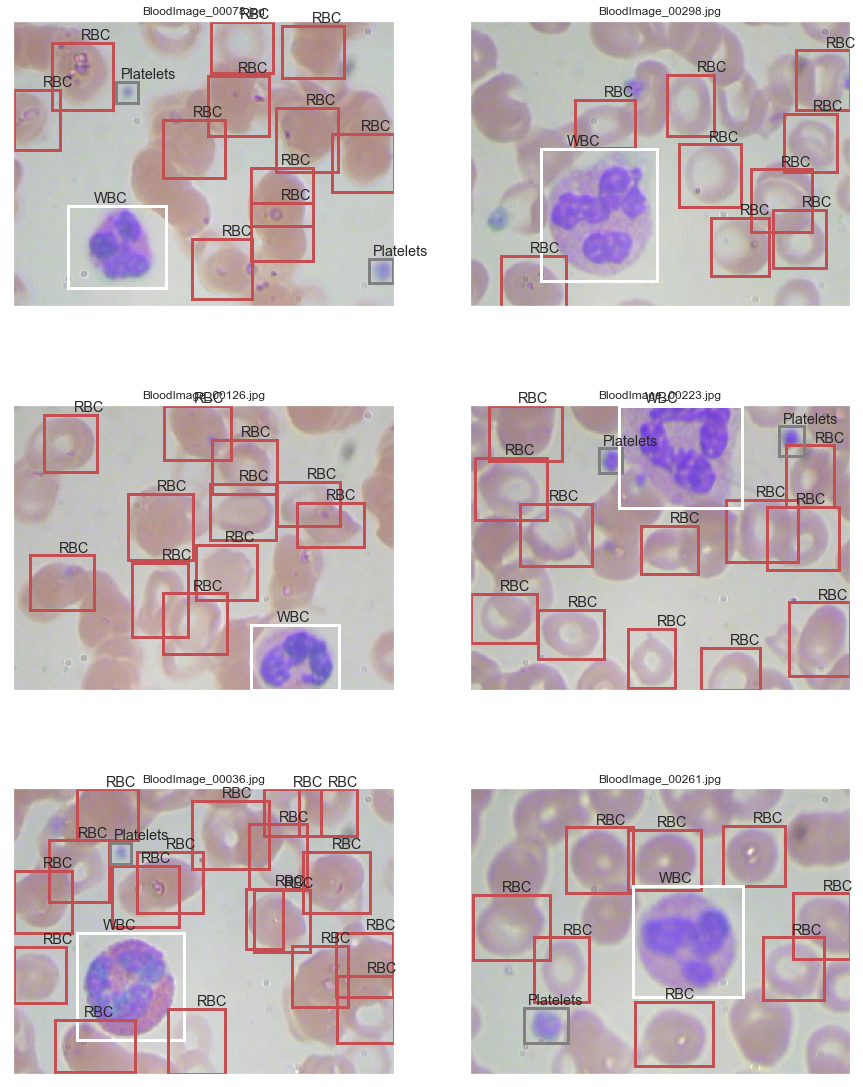

In [45]:
plot_images(train_images, train_dataset)

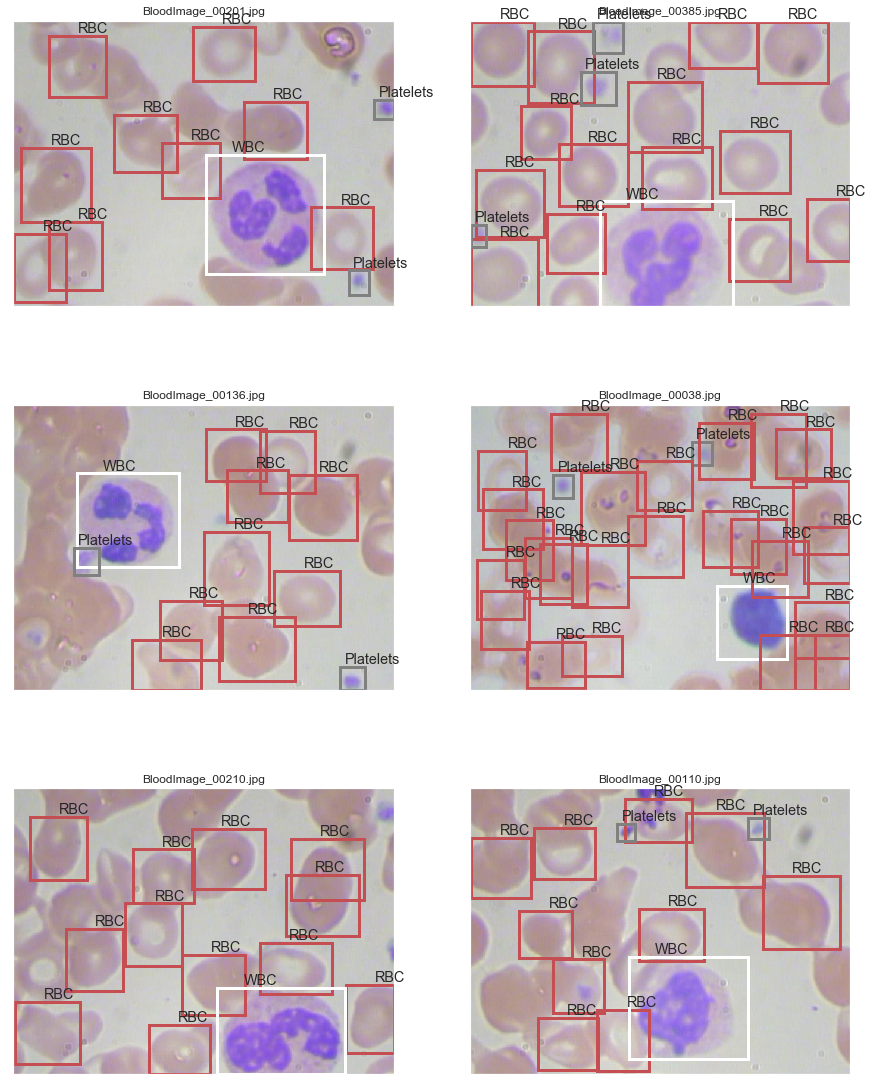

In [46]:
plot_images(test_images, test_dataset)